In [ ]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense


In [ ]:
data=pd.read_csv('/content/mobile_accelerometer_car_data.csv')

Commençons par parcourir les données en listant les valeurs maximales, minimales et moyennes

In [ ]:
data.describe()

,acc_x,acc_y,acc_z,target
count,120000.000000,120000.000000,120000.000000,120000.000000
mean,-0.354549,5.367115,6.729311,0.500000
std,1.931744,3.420114,2.588606,0.500002
min,-12.509735,-19.051361,-19.093689,0.000000
25%,-1.116619,1.902695,4.829160,0.000000
50%,-0.529119,6.922834,6.459327,0.500000
75%,-0.092177,8.182184,9.212952,1.000000
max,36.782090,13.737244,60.973206,1.000000


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   acc_x   120000 non-null  float64
 1   acc_y   120000 non-null  float64
 2   acc_z   120000 non-null  float64
 3   target  120000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.7 MB


**Vérifier la corrélation avec le graphique de la carte thermique**

Ensuite, exécutez ce code pour voir toute corrélation entre les variables. Ce n'est pas important pour le modèle final, mais est utile pour mieux comprendre les données.

Seaborn crée un graphique de type heatmap, en traçant chaque valeur de l'ensemble de données par rapport à lui-même et à chaque autre valeur. Ensuite, il détermine si ces deux valeurs sont en quelque sorte corrélées entre elles.

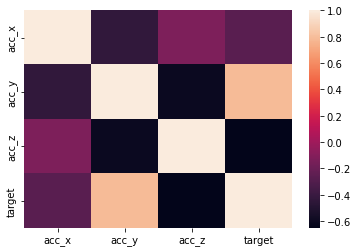

In [ ]:
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Préparer les ensembles de données de test et de formation**

In [ ]:

import numpy as np

labels=data['target']
features = data.iloc[:,0:3]

from sklearn.model_selection import train_test_split

X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

StandardScaler le fait en deux étapes:  fit () et transform () .

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  

**Le modèle séquentiel Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(3,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
80400/80400 [==============================] - 115s 1ms/step - loss: 0.1747 - accuracy: 0.9340
Epoch 2/4
80400/80400 [==============================] - 113s 1ms/step - loss: 0.1657 - accuracy: 0.9383
Epoch 3/4
80400/80400 [==============================] - 115s 1ms/step - loss: 0.1602 - accuracy: 0.9403
Epoch 4/4
80400/80400 [==============================] - 112s 1ms/step - loss: 0.1556 - accuracy: 0.9405


In [ ]:
for layer in model.layers:
    weights = layer.get_weights()

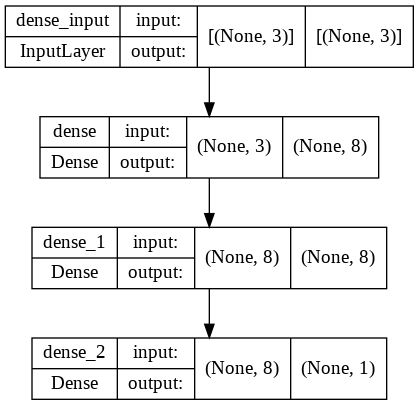

In [ ]:
##from keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

1238/1238 [==============================] - 2s 1ms/step - loss: 0.1621 - accuracy: 0.9367
[0.1620846688747406, 0.93669193983078]


Ainsi, notre modèle prédictif est précis à 93%.

In [ ]:
import tensorflow as tf

# Create a converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model
tflite_model = converter.convert()
# Create the tflite model file
tflite_model_name = "mymodel.tflite"
open(tflite_model_name, "wb").write(tflite_model)
# Set quantize to true 
converter.post_training_quantize=True